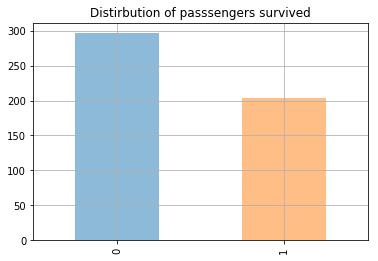

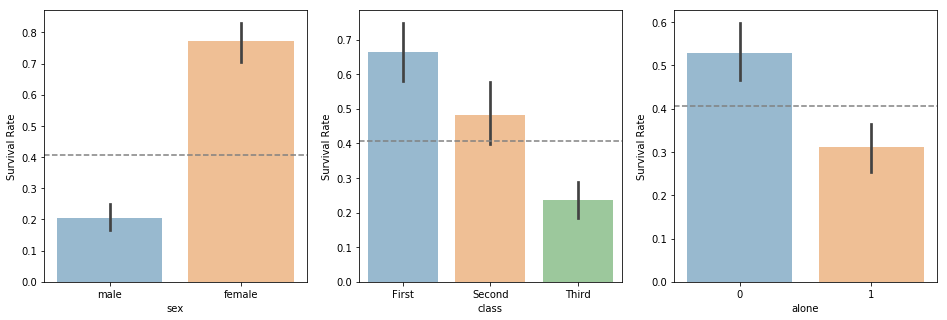

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from acquire import get_titanic_data
from prepare import prep_titanic_data

df = prep_titanic_data(get_titanic_data())

# Drop na values
df = df[pd.notna(df.age)]
df.head()

# Split the data
train_df, test_df = train_test_split(
    df, test_size=.30, random_state=123, stratify=df[['survived']])

train_df.survived.value_counts().sort_index().plot(kind = "bar",alpha = .5)
plt.title("Distirbution of passsengers survived")
plt.grid(b = True , which = "major")

features = ['sex', 'class', 'alone']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

survival_rate = train_df.survived.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=train_df, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')

    

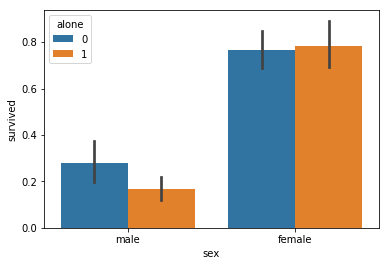

In [3]:
sns.barplot('sex', 'survived', data=train_df, hue='alone')

In [5]:
train_df.columns

Index(['passenger_id', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'embark_town', 'alone', 'embarked_encode'],
      dtype='object')

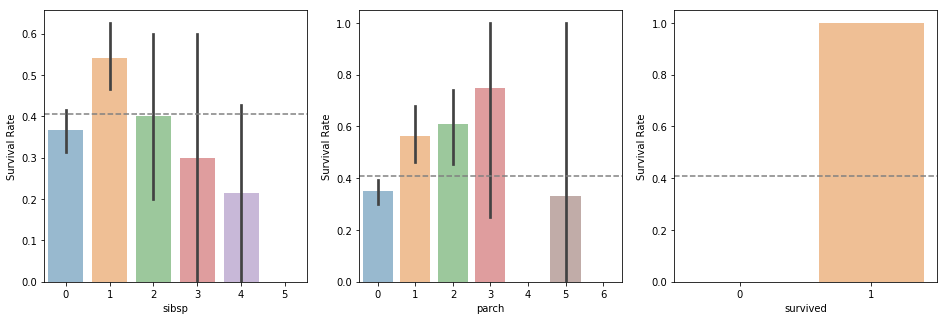

In [6]:
features = ['sibsp', 'parch', 'survived']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(14,8))

survival_rate = train_df.survived.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=train_df, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')